In [12]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

In [17]:
import ml_pipeline
filename = 'credit-data.csv'

#### 1. Read Data 

In [18]:
df = ml_pipeline.load_data(filename)

#### 2. ExploreData

#### Basic overview of people in dataset 


In [19]:
overview = {'Average Age': df["age"].mean(), 'Average Debt Ratio': df["DebtRatio"].mean(),'Average Monthly Income': df["MonthlyIncome"].mean(),
           "Average Outstanding Debt Divided by Credit Limit Sum": [df["RevolvingUtilizationOfUnsecuredLines"].mean()]}
overview_df = pd.DataFrame(data=overview).round(2)
overview_df



,Average Age,Average Debt Ratio,Average Monthly Income,Average Outstanding Debt Divided by Credit Limit Sum
0,51.68,331.46,6579.0,6.38


#### What percentage of people default? 
#### 16 percent 

In [20]:
df.SeriousDlqin2yrs.mean()

0.1614004291008387

#### Find the average income in each zipcode in the dataset 

In [21]:
col_names = 'MonthlyIncome'
zip_col_name = "zipcode"
ml_pipeline.per_zip(df, col_names, zip_col_name)

,zipcode,MonthlyIncome
0,60601,6939.74
1,60618,6414.65
2,60625,6506.11
3,60629,6437.08
4,60637,6389.54
5,60644,7274.66


#### This makes a histogram of the data and then looks at the percentage of the data above a certain threshold. While most people have a small number of lines of credit open, 28 percent of people have more than 10. 2.6 percent have more than 20.

0.28657109420713867
0.026477472205968404


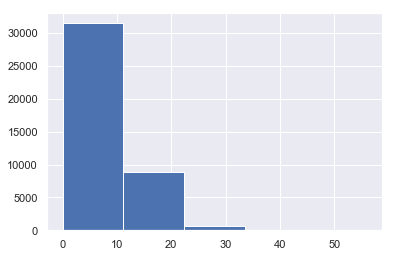

In [22]:
df.NumberOfOpenCreditLinesAndLoans.hist(bins=5)

ml_pipeline.percentage_calc(df, "NumberOfOpenCreditLinesAndLoans", 10)
ml_pipeline.percentage_calc(df, "NumberOfOpenCreditLinesAndLoans", 20)

#### Here I'm checking the features for correlation. From this we can see that, as one would imagine, there is high correlation between NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse. This makes sense as people that are say 35 days late on a payment are also very likely to be 90 days late on a payment. There is also moderatly high correlation between NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines, which also makes intuitive sense as both measure number of open lines of credit. None of these are problomatic for the model used in this assignment, however. 







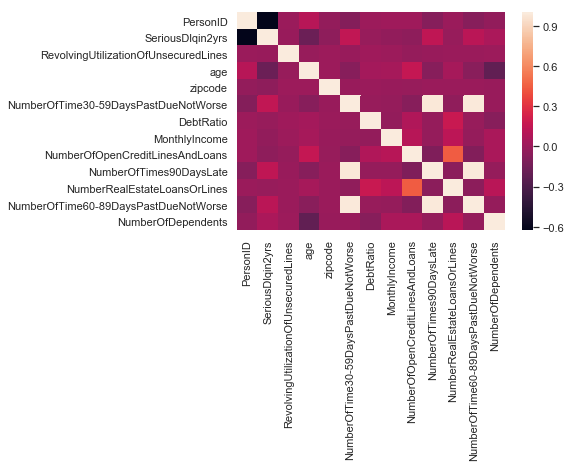

In [31]:
ml_pipeline.find_corr(df)

#### 3. Pre-ProcessData:

#### Next, I find  which collumns have missing values and imputes NaN values with the mean or median values depending on what is appropriate. For income, 
#### The mean is intuitively appropriate for income, but for number of dependents we want to use median for the simple reason that one cannot pysically have, say, 2.3 children. 

In [23]:
#find out which columns have missing values
df.columns[df.isna().any()].tolist()

['MonthlyIncome', 'NumberOfDependents']

In [24]:
df = ml_pipeline.impute(df, ['MonthlyIncome'], ['NumberOfDependents'])

#### 4. GenerateFeatures/Predictors:

#### We want to create dummmy variables for each zipcode as we wouldnt want the fact that they are  numeric to be interpreted by our model in unforseen ways. 




In [25]:
df = ml_pipeline.dummy(df, 'zipcode')

#### For some continous variables it can be useful to discretize them into buckets. I chose to do four here, which (for example) when used on Monthly Income, would represent, low income, low-medium income, high-medium income, and high income groups of people. 

In [26]:
df = ml_pipeline.discretize(df, 'DebtRatio')
df = ml_pipeline.discretize(df, 'MonthlyIncome')

#### 5. BuildClassifier

#### Creating a list of the feautures to put into the model, so leaving out the Y value SeriousDlqin2yrs, a persons unique id as that would give us a very overfitted model.

In [27]:
features = [x for x in df.columns if x not in ['SeriousDlqin2yrs', 'PersonID']]


#### Create data arrays for the X and Y values needed to be plugged into the model and train the logistic regression model. 

In [31]:
X, y = ml_pipeline.get_xy(df, 'SeriousDlqin2yrs', features)


#### 6. Evaluate Classifier

#### Finally, print the accurancy, which the percentage of predictions that the model actually got correct. In this case its 85 percent. 

In [46]:
lg = ml_pipeline.classify_lgreg(X,y)
print(ml_pipeline.accuracy(y, lg.predict(X)))

0.8514238346011312


#### I know that accuracy is not a perfect indicator of the predicitve quality of a model so I also created a confusion matrix. The results show that the model predicted true positive values 34155 times, false positive values 241. It produced false negatives 5853 times and true negatives 767 times. The model has a precison rate of 76 percent, meaning it correctly predicts default 76 percent of the time. The model has a recall rate of 1.9 percent, meaning that it identifies 1.9 percent of the defaults. There is a wide discrepency between the effcicay of the model as measured by accuracy and as measured through precision and recall because the number of positives is very low relative to the sample size. 



In [34]:
confusion = confusion_matrix(y, lg.predict(X))
print(confusion)

[[34155   241]
 [ 5853   767]]


In [48]:
precision = confusion[1][1]/(confusion[1][1] + confusion[0][1])
print("Precision = ", precision)
Recall = confusion[1][1]/(confusion[0][0] + confusion[1][0])
print("Recall = ", Recall)

Precision =  0.7609126984126984
Recall =  0.019171165766846632


#### In this data analysis I built a simple model to predict the risk of default in a 2 year period. I did basic processing and exploration of the data. In future versions, there could be more careful feature selection (as shown above multiple features are highly correlated). Further, as the models recall is so low its likely that there would be better models for the shape of this data.

